In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
%matplotlib inline
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


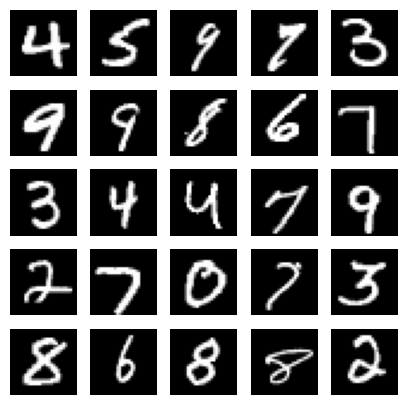

In [3]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [6]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [7]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [8]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

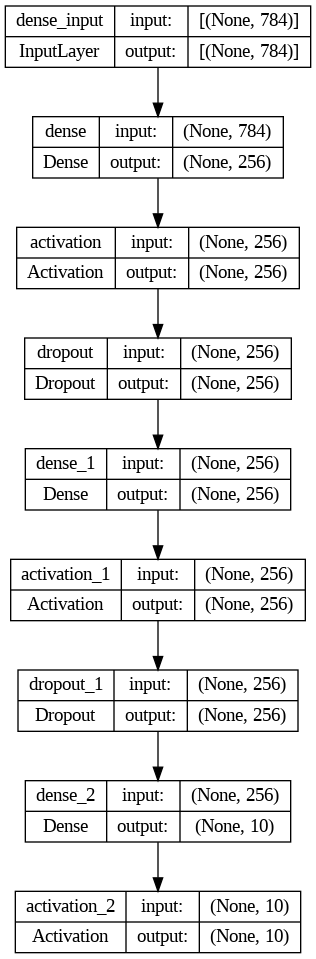

In [9]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)


In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 13s 23ms/step - loss: 0.4208 - accuracy: 0.8709
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1938 - accuracy: 0.9423
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1527 - accuracy: 0.9545
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1278 - accuracy: 0.9615
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1131 - accuracy: 0.9657
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1010 - accuracy: 0.9686
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0974 - accuracy: 0.9704
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0873 - accuracy: 0.9725
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0825 - accuracy: 0.9740
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0786 - accur

In [11]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 4ms/step - loss: 0.0675 - accuracy: 0.9812

Test accuracy: 98.1%
